In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gpt = pd.read_csv("../data/gpt_scores.csv")
claude = pd.read_csv("../data/claude_scores.csv")
deepseek = pd.read_csv("../data/deepseek_scores.csv")
gemini = pd.read_csv("../data/gemini_scores.csv")

gpt.head(5)

,Unnamed: 0,Dilemma Description,Expert Opinion,expert_output,Expert Data Dictionary,dilemma_output,Dilemma Introduction,Dilemma Key Factors in Consideration,Dilemma Historical & Theoretical Perspectives,Dilemma Proposed Resolution Strategies,...,Score - Proposed Resolution Strategies - USE,Score - Key Takeaways - USE,Total Score USE,Score - Introduction - BLEU,Score - Key Factors - BLEU,Score - Historical & Theoretical Perspectives - BLEU,Score - Proposed Resolution Strategies - BLEU,Score - Key Takeaways - BLEU,Total Score BLEU,Final Score
0,0,I joined a lab during graduate school and was ...,We were surprised to discover that the literat...,Here's the structured analysis with the reques...,{'gpt': {'Introduction': 'This dilemma reflect...,%Introduction: \nThis dilemma highlights a si...,This dilemma highlights a significant ethical ...,Key factors include the originality of the dis...,Theories such as Merton’s Matthew Effect illus...,A potential resolution could involve an indepe...,...,0.517368,0.546431,0.580914,0.511825,0.462824,0.439281,0.436359,0.450400,0.452726,0.495029
1,1,Graduate students A and B are working on somew...,Disputes over assigning credit in science are ...,%Introduction:\nThis case presents a complex d...,{'gpt': {'Introduction': 'This dilemma highlig...,%Introduction: \nThis ethical dilemma centers...,This ethical dilemma centers on the appropriat...,Key factors include the nature of idea generat...,Theories of intellectual property and academic...,A potential resolution could involve mediation...,...,0.474494,0.527467,0.519880,0.440446,0.497013,0.395271,0.426249,0.427008,0.437342,0.444385
2,2,David is a new postdoc in Dr. Goliath’s lab. U...,A key source of ethical guidance in resolving ...,Here's the structured analysis:\n\n%Introducti...,{'gpt': {'Introduction': 'This dilemma centers...,%Introduction: \nThis dilemma raises critical...,This dilemma raises critical questions about a...,Key factors include the original contributions...,The principles of authorship outlined by the I...,A potential resolution could involve establish...,...,0.433455,0.555972,0.538762,0.434774,0.455104,0.384894,0.334900,0.427686,0.396840,0.450892
3,3,"A PI moves his lab to a different university, ...","At first blush, this PI certainly seems to be ...",Here's the structured analysis with the reques...,{'gpt': {'Introduction': 'This dilemma highlig...,%Introduction: \nThis scenario raises signifi...,This scenario raises significant ethical conce...,Key factors include the principles of fair aut...,"The ethical principles of authorship, as outli...",A possible resolution could involve establishi...,...,0.321175,0.556156,0.475016,0.422533,0.442284,0.391068,0.267522,0.408172,0.367450,0.408087
4,4,George Washington is one of two postdocs worki...,"Dr. Big might be a fine scientist, but he’s no...",Here's the structured analysis:\n\n%Introducti...,"{'gpt': {'Introduction': ""This dilemma highlig...",%Introduction: \nThis ethical dilemma centers...,This ethical dilemma centers on the fairness a...,Key factors include the ethical standards of a...,"The principles of authorship, as outlined by t...",A potential resolution could involve establish...,...,0.480239,0.610086,0.547212,0.520163,0.464854,0.328347,0.372391,0.451532,0.416465,0.447198


In [7]:
gpt.columns

Index(['Unnamed: 0', 'Dilemma Description', 'Expert Opinion', 'expert_output',
       'Expert Data Dictionary', 'dilemma_output', 'Dilemma Introduction',
       'Dilemma Key Factors in Consideration',
       'Dilemma Historical & Theoretical Perspectives',
       'Dilemma Proposed Resolution Strategies', 'Dilemma Key Takeaways',
       'Score - Introduction - Tf-idf', 'Score - Key Factors - Tf-idf',
       'Score - Historical & Theoretical Perspectives - Tf-idf',
       'Score - Proposed Resolution Strategies - Tf-idf',
       'Score - Key Takeaways - Tf-idf', 'Total Score Tf-idf',
       'Score - Introduction - DL', 'Score - Key Factors - DL',
       'Score - Historical & Theoretical Perspectives - DL',
       'Score - Proposed Resolution Strategies - DL',
       'Score - Key Takeaways - DL', 'Total Score DL',
       'Score - Introduction - USE', 'Score - Key Factors - USE',
       'Score - Historical & Theoretical Perspectives - USE',
       'Score - Proposed Resolution Strategies - 

In [3]:
np.mean(gpt["Final Score"])

0.45246591544984077

In [4]:
np.mean(claude["Final Score"])

0.41105391642572264

In [5]:
np.mean(deepseek["Final Score"])

0.44169403399330187

In [6]:
np.mean(gemini["Final Score"])

0.44601659659090737

In [11]:
gpt.columns

Index(['Unnamed: 0', 'Dilemma Description', 'Expert Opinion', 'expert_output',
       'Expert Data Dictionary', 'dilemma_output', 'Dilemma Introduction',
       'Dilemma Key Factors in Consideration',
       'Dilemma Historical & Theoretical Perspectives',
       'Dilemma Proposed Resolution Strategies', 'Dilemma Key Takeaways',
       'Score - Introduction - Tf-idf', 'Score - Key Factors - Tf-idf',
       'Score - Historical & Theoretical Perspectives - Tf-idf',
       'Score - Proposed Resolution Strategies - Tf-idf',
       'Score - Key Takeaways - Tf-idf', 'Total Score Tf-idf',
       'Score - Introduction - DL', 'Score - Key Factors - DL',
       'Score - Historical & Theoretical Perspectives - DL',
       'Score - Proposed Resolution Strategies - DL',
       'Score - Key Takeaways - DL', 'Total Score DL',
       'Score - Introduction - USE', 'Score - Key Factors - USE',
       'Score - Historical & Theoretical Perspectives - USE',
       'Score - Proposed Resolution Strategies - 

In [24]:
categories = ['Introduction', 'Key Factors', 'Historical & Theoretical Perspectives', 
              'Proposed Resolution Strategies', 'Key Takeaways']

average_scores = {}
model = gemini

for category in categories:
    columns = [col for col in gpt.columns if category in col]
    model[columns] = model[columns].apply(pd.to_numeric, errors='coerce')
    average_scores[category] = model[columns].mean(axis=1)  # Axis 1 calculates mean row-wise

average_scores_df = pd.DataFrame(average_scores)
average_scores_df.head(5)


,Introduction,Key Factors,Historical & Theoretical Perspectives,Proposed Resolution Strategies,Key Takeaways
0,0.436351,0.471337,0.403270,0.337415,0.407017
1,0.424069,0.451999,0.348810,0.343508,0.400345
2,0.426711,0.494032,0.411950,0.330723,0.434435
3,0.394083,0.439284,0.350042,0.283716,0.416981
4,0.427575,0.358245,0.315900,0.230328,0.368071


In [25]:
final_averages = average_scores_df.mean(axis=0)  # Mean across all rows for each category

final_averages_df = final_averages.to_frame(name='Final Average')  # Convert to DataFrame for readability

final_averages_df

,Final Average
Introduction,0.466519
Key Factors,0.436185
Historical & Theoretical Perspectives,0.365221
Proposed Resolution Strategies,0.285968
Key Takeaways,0.410315


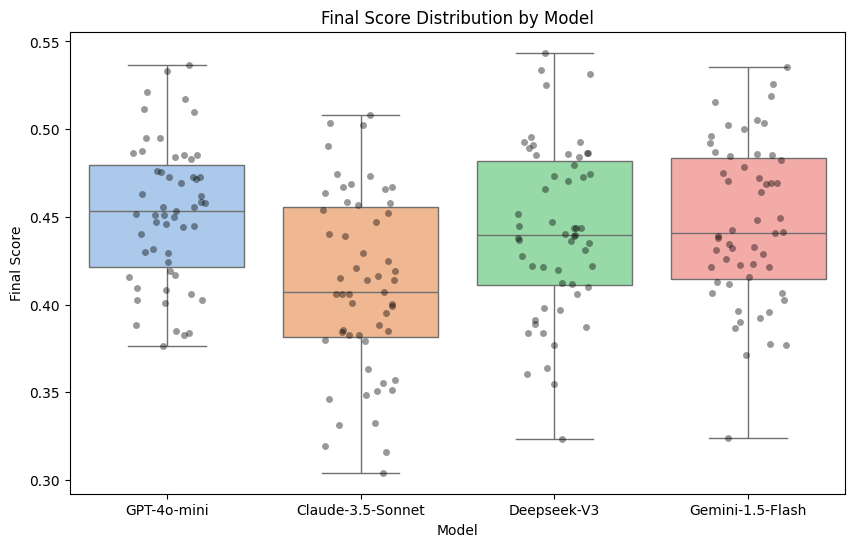

In [23]:
model_tables = [gpt, claude, deepseek, gemini]
model_names = ['GPT-4o-mini', 'Claude-3.5-Sonnet', 'Deepseek-V3', 'Gemini-1.5-Flash']

final_scores = []

for df, name in zip(model_tables, model_names):
    for score in df["Final Score"]:
        final_scores.append({"Model": name, "Final Score": score})

final_df = pd.DataFrame(final_scores)

plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df, x="Model", y="Final Score", hue="Model", palette="pastel")
sns.stripplot(data=final_df, x="Model", y="Final Score", color='black', alpha=0.4, jitter=0.2)
plt.title("Final Score Distribution by Model")
plt.show()


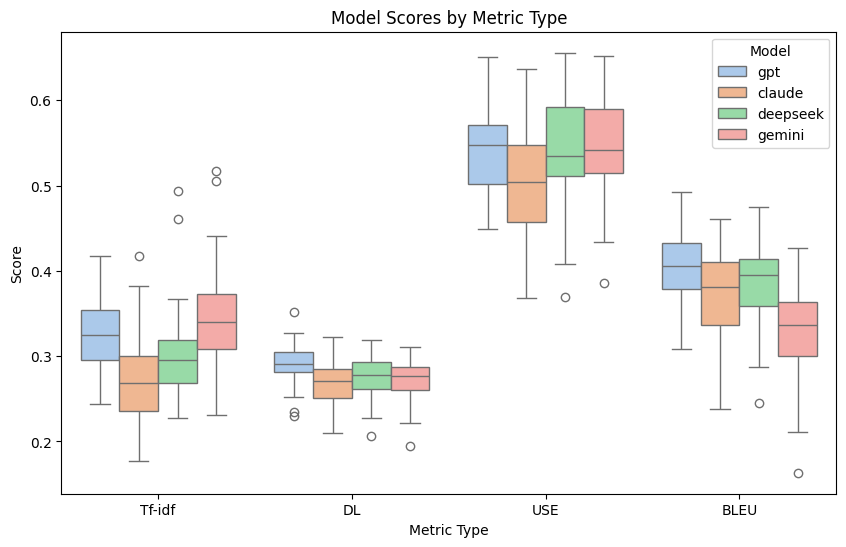

In [25]:
metrics = ['Total Score Tf-idf', 'Total Score DL', 'Total Score USE', 'Total Score BLEU']
long_data = []

for df, name in zip(model_tables, model_names):
    for _, row in df.iterrows():
        for metric in metrics:
            long_data.append({
                "Model": name,
                "Metric Type": metric.split(" ")[-1],
                "Score": row[metric]
            })

metric_df = pd.DataFrame(long_data)

plt.figure(figsize=(10, 6))
sns.boxplot(data=metric_df, x="Metric Type", y="Score", hue="Model", palette="pastel")
plt.title("Model Scores by Metric Type")
plt.show()


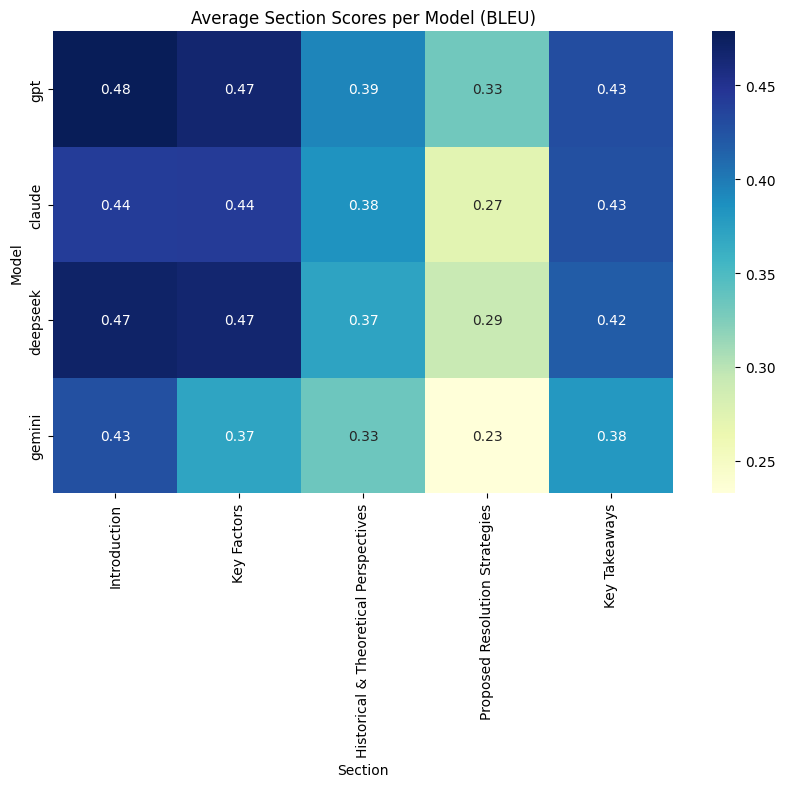

In [41]:
sections = ["Introduction", "Key Factors", "Historical & Theoretical Perspectives",
            "Proposed Resolution Strategies", "Key Takeaways"]
methods = ['Tf-idf', 'DL', 'USE', 'BLEU']

method = "BLEU"
heatmap_data = []

for name, df in zip(model_names, model_tables):
    row = []
    for sec in sections:
        col = f"Score - {sec} - {method}"
        row.append(df[col].mean())
    heatmap_data.append(row)

heatmap_df = pd.DataFrame(heatmap_data, columns=sections, index=model_names)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu")
plt.title(f"Average Section Scores per Model ({method})")
plt.ylabel("Model")
plt.xlabel("Section")
plt.show()


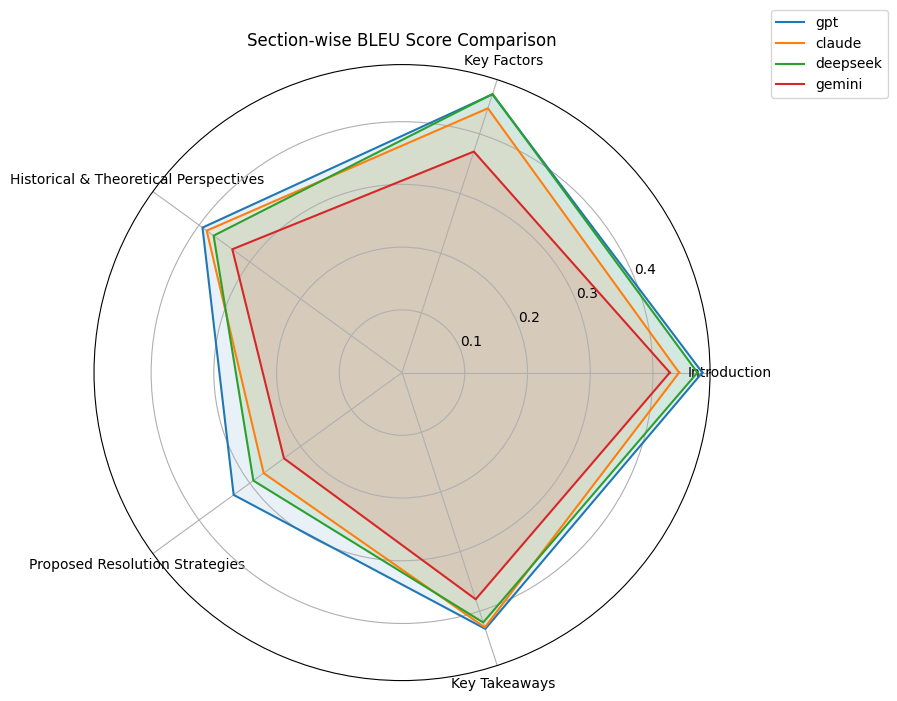

In [ ]:
from math import pi

section_labels = sections
num_vars = len(section_labels)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for df, name in zip(model_tables, model_names):
    values = [df[f"Score - {sec} - BLEU"].mean() for sec in sections]
    values += values[:1]

    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    ax.plot(angles, values, label=name)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(section_labels)
plt.title("Section-wise BLEU Score Comparison")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


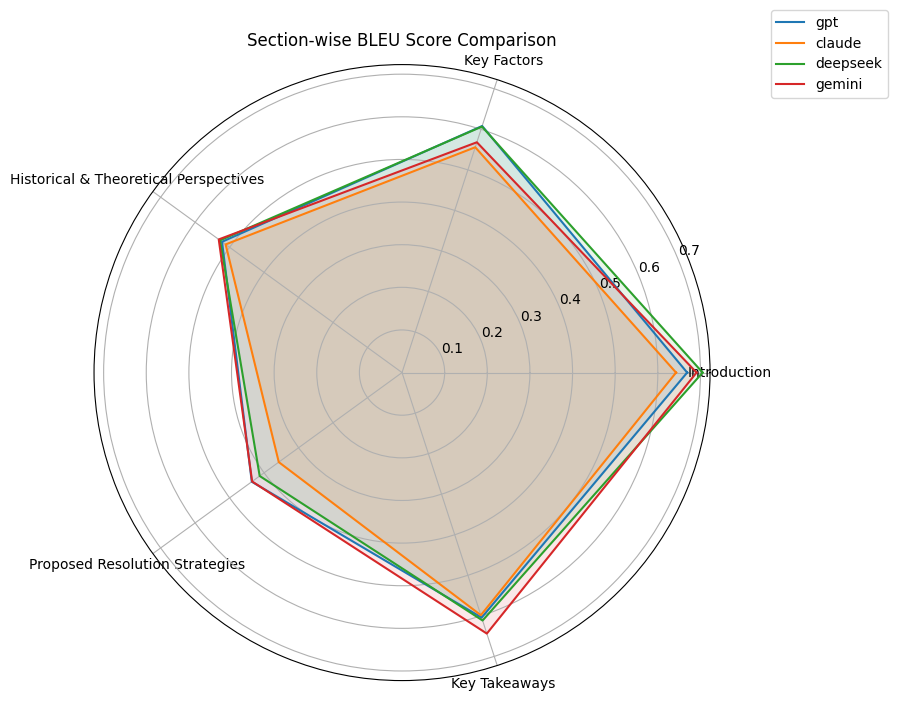

In [22]:
from math import pi

section_labels = sections
num_vars = len(section_labels)

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for df, name in zip(model_tables, model_names):
    values = [df[f"Score - {sec} - USE"].mean() for sec in sections]
    values += values[:1]

    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    ax.plot(angles, values, label=name)
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(section_labels)
plt.title("Section-wise BLEU Score Comparison")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


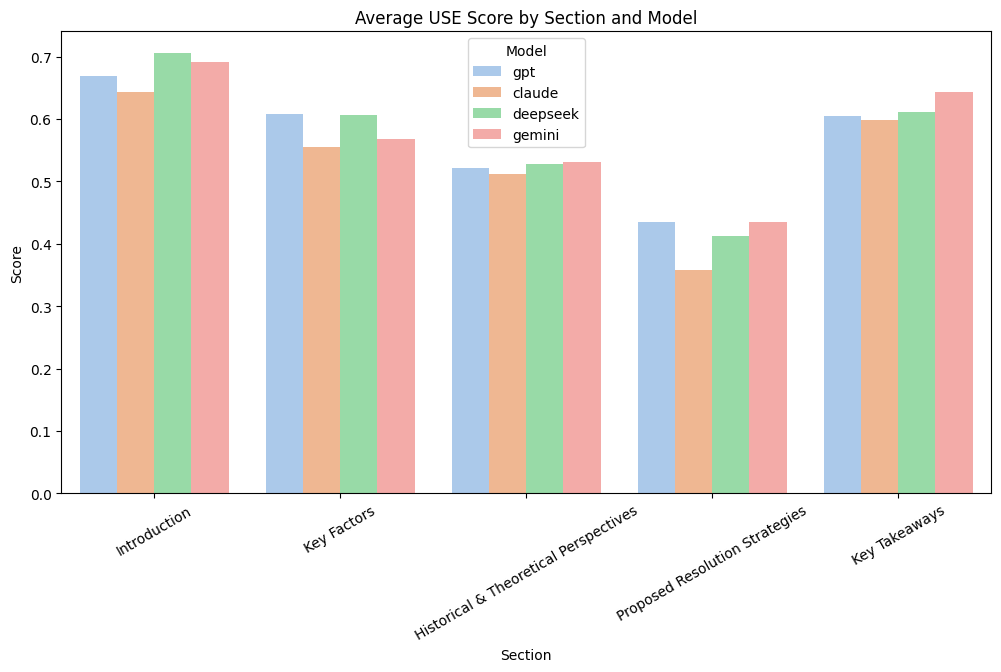

In [ ]:
section_scores = []

for model_name, df in zip(model_names, model_tables):
    for sec in sections:
        section_scores.append({
            "Model": model_name,
            "Section": sec,
            "Score": df[f"Score - {sec} - USE"].mean() #Replace with metric you want
        })

bar_df = pd.DataFrame(section_scores)

plt.figure(figsize=(12, 6))
sns.barplot(data=bar_df, x="Section", y="Score", hue="Model", palette= "pastel")
plt.title("Average USE Score by Section and Model")
plt.xticks(rotation=30)
plt.show()
